In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as rnd
from sklearn.model_selection import train_test_split
from scipy.stats import norm, skew
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier

In [2]:
fpath_train = "C:\\Users\\Happy\\Desktop\\kaggle\\Titanic\\data\\train.csv"
fpath_test = "C:\\Users\\Happy\\Desktop\\kaggle\\Titanic\\data\\test.csv"
data_train = pd.read_csv(fpath_train)
data_test  = pd.read_csv(fpath_test)

In [3]:
data_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
categorical_features=[features for features in data_train.columns if data_train[features].dtypes=='O']
categorical_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [5]:
numerical_features=[features for features in data_train.columns if data_train[features].dtypes!='O']
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [6]:
data_train.info()
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass  

In [7]:
count_no_sur = len(data_train[data_train['Survived']==0])
count_sur = len(data_train[data_train['Survived']==1])
pct_of_no_sur = count_no_sur/(count_no_sur+count_sur)
print("percentage of people that did not survive is", pct_of_no_sur*100)
pct_of_sur = count_sur/(count_no_sur+count_sur)
print("percentage of people that survived is", pct_of_sur*100)

percentage of people that did not survive is 61.61616161616161
percentage of people that survived is 38.38383838383838


0    549
1    342
Name: Survived, dtype: int64

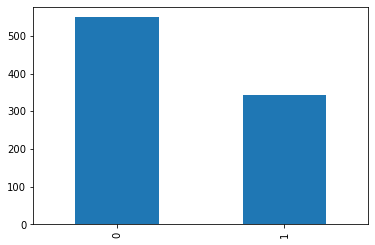

In [8]:
data_train.Survived.value_counts().plot(kind='bar')
data_train.Survived.value_counts()

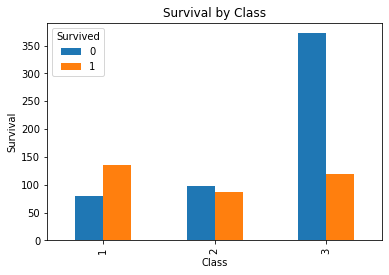

In [9]:
pd.crosstab(data_train.Pclass,data_train.Survived).plot(kind='bar')
plt.title('Survival by Class')
plt.xlabel('Class')
plt.ylabel('Survival')
plt.savefig("Clssur.jpeg")

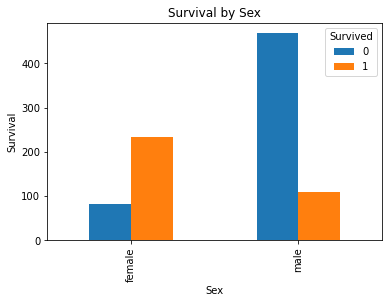

In [10]:
pd.crosstab(data_train.Sex,data_train.Survived).plot(kind='bar')
plt.title('Survival by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival')
plt.savefig("sursex.jpg")

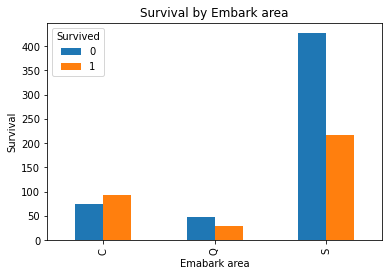

In [11]:
pd.crosstab(data_train.Embarked,data_train.Survived).plot(kind='bar')
plt.title('Survival by Embark area')
plt.xlabel('Emabark area')
plt.ylabel('Survival')
plt.savefig("suremb.jpg")

c:\users\happy\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


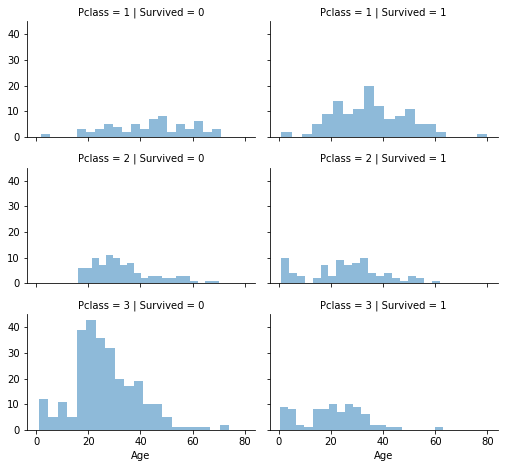

In [12]:
grid = sns.FacetGrid(data_train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Text(0, 0.5, 'Frequency')

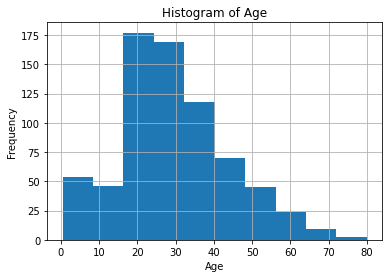

In [13]:
data_train.Age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

c:\users\happy\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\happy\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
c:\users\happy\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


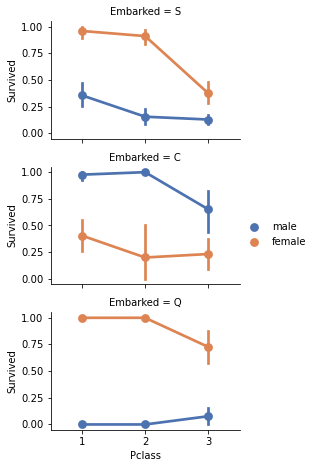

In [14]:
grid = sns.FacetGrid(data_train, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

c:\users\happy\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\happy\appdata\local\programs\python\python38\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


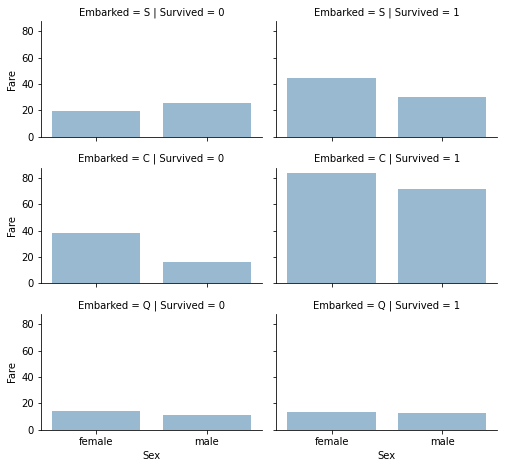

In [15]:
grid = sns.FacetGrid(data_train, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

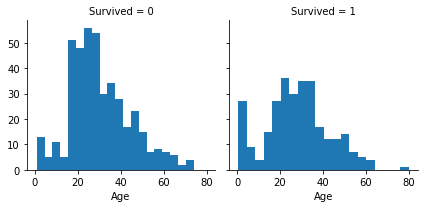

In [16]:
g = sns.FacetGrid(data_train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

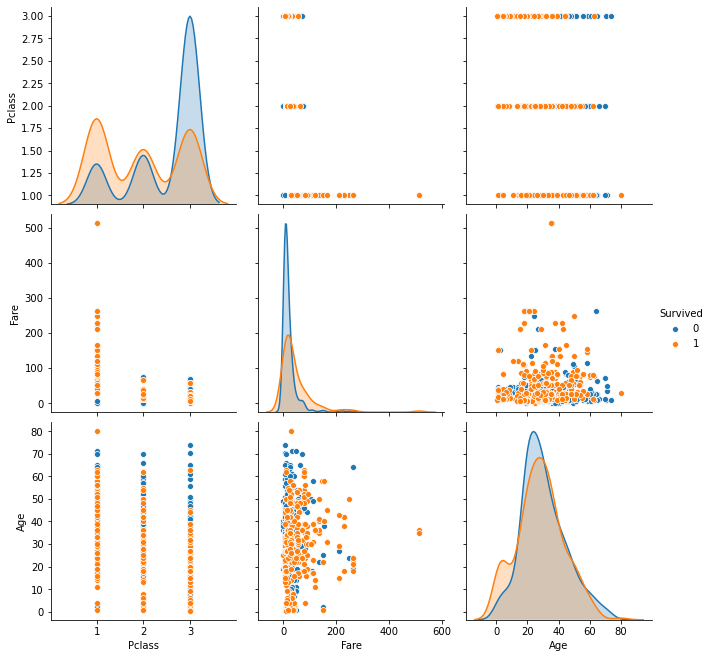

In [17]:
sns.pairplot(data_train[["Survived","Pclass","Fare","Age","Sex"]], hue="Survived", height=3);
plt.show()

In [18]:
grouped_data = pd.concat(
    [data_train.groupby(['Pclass', 'Sex'])['Survived'].mean(),
     data_train.groupby(['Pclass', 'Sex'])['Survived'].count()],axis=1)
grouped_data.columns = ['Survived', 'Count']
grouped_data

Survived  Count
Pclass Sex                    
1      female  0.968085     94
       male    0.368852    122
2      female  0.921053     76
       male    0.157407    108
3      female  0.500000    144
       male    0.135447    347

<AxesSubplot:>

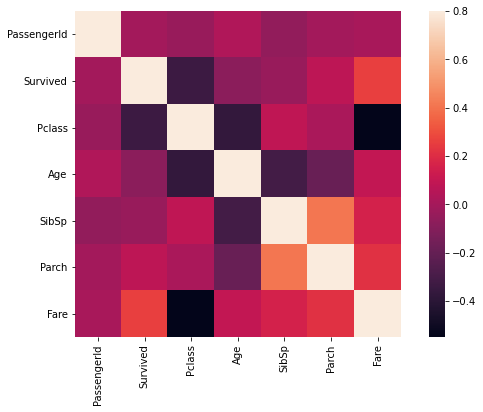

In [19]:
corrmat = data_train.corr()
f, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(corrmat, vmax=.8, square=True)

In [20]:
ntrain = data_train.shape[0]
ntest = data_test.shape[0]

In [21]:
all_data = pd.concat((data_train, data_test)).reset_index(drop=True)
all_data.drop(['Survived'], axis=1, inplace=True)
print("all_data size is : {}".format(all_data.shape))

all_data size is : (1309, 11)


In [22]:
total = all_data.isnull().sum().sort_values(ascending=False)
percent = (all_data.isnull().sum()/all_data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Cabin,1014,0.774637
Age,263,0.200917
Embarked,2,0.001528
Fare,1,0.000764
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [23]:
all_data = all_data.drop(['PassengerId','Ticket', 'Cabin'], axis=1)

In [24]:
all_data.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [25]:
all_data = all_data.drop(['Name'], axis=1)

In [26]:
age_by_pclass_sex = all_data.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
        
print('Median age of all passengers: {}'.format(all_data['Age'].median()))

Median age of Pclass 1 females: 36.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 29.5
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [27]:
all_data['Age']= all_data.groupby(['Sex','Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))
all_data['Age'].isnull().sum()

0

In [28]:
for index, row in all_data.iterrows():
    if row['Age'] <= 16: 
        all_data.at[index,'Age'] = 0
    elif row['Age'] > 16 and row['Age'] <= 32 :
        all_data.at[index,'Age'] = 1
    elif row['Age'] > 32 and row['Age'] <= 48 :
        all_data.at[index,'Age'] = 2
    elif row['Age'] > 48 and row['Age'] <= 64 :
        all_data.at[index,'Age'] = 3
    elif row['Age'] > 64 :
        all_data.at[index,'Age'] = 4
        
all_data.head()        

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,1.0,1,0,7.2500,S
1,1,female,2.0,1,0,71.2833,C
2,3,female,1.0,0,0,7.9250,S
3,1,female,2.0,1,0,53.1000,S
4,3,male,2.0,0,0,8.0500,S


In [29]:
all_data['Family'] = (all_data['SibSp'] > 0) | (all_data['Parch'] > 0)

In [30]:
all_data = all_data.drop(['SibSp','Parch'], axis=1)

In [31]:
freq_port=all_data['Embarked'].mode()
all_data['Embarked']= all_data['Embarked'].fillna('freq_port')

In [32]:
freq_port

0    S
dtype: object

In [33]:
for index, row in all_data.iterrows():
    if row['Fare'] <= 7.91: 
        all_data.at[index,'Fare'] = 0
    elif row['Fare'] > 7.91 and row['Fare'] <= 14.454 :
        all_data.at[index,'Fare'] = 1
    elif row['Fare'] > 14.454 and row['Fare'] <= 31 :
        all_data.at[index,'Fare'] = 2
    elif row['Fare'] > 31 :
        all_data.at[index,'Fare'] = 3
        
all_data.head()       

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,male,1.0,0.0,S,True
1,1,female,2.0,3.0,C,True
2,3,female,1.0,1.0,S,False
3,1,female,2.0,3.0,S,True
4,3,male,2.0,1.0,S,False


In [34]:
lbl= LabelEncoder()
lbl.fit(list(all_data['Sex'].values)) 
all_data['Sex'] = lbl.transform(list(all_data['Sex'].values))

In [35]:
lbl.fit(list(all_data['Embarked'].values)) 
all_data['Embarked'] = lbl.transform(list(all_data['Embarked'].values))

In [36]:
all_data.head()

,Pclass,Sex,Age,Fare,Embarked,Family
0,3,1,1.0,0.0,2,True
1,1,0,2.0,3.0,0,True
2,3,0,1.0,1.0,2,False
3,1,0,2.0,3.0,2,True
4,3,1,2.0,1.0,2,False


In [37]:
all_data.shape

(1309, 6)

In [38]:
train = all_data[:ntrain]
test = all_data[ntrain:]

In [39]:
x = train

In [40]:
y_train= data_train['Survived']

In [41]:
GBR = GradientBoostingClassifier(n_estimators=100, max_depth=4)
GBR.fit(x,y_train)

GradientBoostingClassifier(max_depth=4)

In [44]:
test.isna().sum()

Pclass      0
Sex         0
Age         0
Fare        1
Embarked    0
Family      0
dtype: int64

In [48]:
med_fare = 0
all_data['Fare'] = all_data['Fare'].fillna(med_fare)

In [49]:
test = all_data[ntrain:]

In [50]:
Y_pred = GBR.predict(test)

In [51]:
ID = data_test['PassengerId']

In [52]:
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = Y_pred
submission.to_csv('submission01.csv',index=False)

In [53]:
rd = RandomForestClassifier()

In [54]:
rd.fit(x,y_train)

RandomForestClassifier()

In [55]:
Y_pred = rd.predict(test)

In [56]:
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = Y_pred
submission.to_csv('submission02.csv',index=False)

In [57]:
logreg = LogisticRegression()
logreg.fit(x, y_train)
Y_pred = logreg.predict(test)

In [58]:
submission=pd.DataFrame()
submission['PassengerId'] = ID
submission['Survived'] = Y_pred
submission.to_csv('submission03.csv',index=False)

In [59]:
coeff_df = pd.DataFrame(all_data.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
3,Embarked,-0.054338
4,Family,-0.254778
2,Fare,-0.560821
0,Sex,-1.219949
1,Age,-2.517240
